In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.8.2


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [9]:
temp_no = pd.read_csv("no_tac.csv", index_col=False)
temp_yes = pd.read_csv("only_tac.csv", index_col=False)

In [10]:
temp_no.head()

,Unnamed: 0,pid,range_start_tac,range_end_tac,tac,time_acc,x,y,z,time_acc_sec
0,0,MJ8002,1493736009,1493737832,0,1493736949591,0.0025,0.0043,-0.0027,1493736949
1,1,MJ8002,1493736009,1493737832,0,1493736949616,-0.0003,-0.0013,-0.0051,1493736949
2,2,MJ8002,1493736009,1493737832,0,1493736949641,0.0022,0.0014,-0.0027,1493736949
3,3,MJ8002,1493736009,1493737832,0,1493736949665,0.0006,-0.0010,-0.0047,1493736949
4,4,MJ8002,1493736009,1493737832,0,1493736949691,0.0009,-0.0005,-0.0055,1493736949


In [11]:
all_frames = [temp_yes, temp_no]
for frame in all_frames:
    frame.drop("pid", axis=1, inplace=True)
    frame.drop("range_start_tac", axis=1, inplace=True)
    frame.drop("range_end_tac", axis=1, inplace=True)
    frame.drop("time_acc_sec", axis=1, inplace=True)

In [12]:
temp_yes.drop('Unnamed: 0', axis =1, inplace=True)
temp_no.drop('Unnamed: 0', axis =1, inplace=True)

In [13]:
print(temp_yes)
print(temp_yes.size)

       tac       time_acc       x       y       z
0        1  1493746992001 -0.0008 -0.0004 -0.0028
1        1  1493746992027  0.0017 -0.0005 -0.0030
2        1  1493746992052 -0.0011 -0.0001 -0.0021
3        1  1493746992077 -0.0001 -0.0004 -0.0019
4        1  1493746992107  0.0017  0.0011 -0.0043
...    ...            ...     ...     ...     ...
96387    1  1493768605376 -0.0733 -0.1473  0.1727
96388    1  1493768605401  0.0269 -0.1601  0.1525
96389    1  1493768605425  0.2667 -0.1914  0.0955
96390    1  1493768605451  0.3787 -0.1690  0.1245
96391    1  1493768605476  0.4629 -0.0231  0.3096

[96392 rows x 5 columns]
481960


In [14]:
print(temp_no.head(96392))
print(temp_no.size)

       tac       time_acc       x       y       z
0        0  1493736949591  0.0025  0.0043 -0.0027
1        0  1493736949616 -0.0003 -0.0013 -0.0051
2        0  1493736949641  0.0022  0.0014 -0.0027
3        0  1493736949665  0.0006 -0.0010 -0.0047
4        0  1493736949691  0.0009 -0.0005 -0.0055
...    ...            ...     ...     ...     ...
96387    0  1493757304228 -0.0571 -0.0671 -0.0038
96388    0  1493757304255 -0.0984 -0.0623  0.0460
96389    0  1493757304278 -0.0952 -0.0038  0.0687
96390    0  1493757304302 -0.0744  0.0052  0.0751
96391    0  1493757304328 -0.0258  0.0304  0.0798

[96392 rows x 5 columns]
1096495


In [15]:
new_temp_no = temp_no.head(96392)
print(new_temp_no)

       tac       time_acc       x       y       z
0        0  1493736949591  0.0025  0.0043 -0.0027
1        0  1493736949616 -0.0003 -0.0013 -0.0051
2        0  1493736949641  0.0022  0.0014 -0.0027
3        0  1493736949665  0.0006 -0.0010 -0.0047
4        0  1493736949691  0.0009 -0.0005 -0.0055
...    ...            ...     ...     ...     ...
96387    0  1493757304228 -0.0571 -0.0671 -0.0038
96388    0  1493757304255 -0.0984 -0.0623  0.0460
96389    0  1493757304278 -0.0952 -0.0038  0.0687
96390    0  1493757304302 -0.0744  0.0052  0.0751
96391    0  1493757304328 -0.0258  0.0304  0.0798

[96392 rows x 5 columns]


#### Load the Dataset 

In [16]:
columns = ['tac', 'time_acc', 'x', 'y', 'z']

In [17]:
data = pd.concat(objs=[temp_yes, new_temp_no])

In [18]:
data

,tac,time_acc,x,y,z
0,1,1493746992001,-0.0008,-0.0004,-0.0028
1,1,1493746992027,0.0017,-0.0005,-0.0030
2,1,1493746992052,-0.0011,-0.0001,-0.0021
3,1,1493746992077,-0.0001,-0.0004,-0.0019
4,1,1493746992107,0.0017,0.0011,-0.0043
...,...,...,...,...,...
96387,0,1493757304228,-0.0571,-0.0671,-0.0038
96388,0,1493757304255,-0.0984,-0.0623,0.0460
96389,0,1493757304278,-0.0952,-0.0038,0.0687
96390,0,1493757304302,-0.0744,0.0052,0.0751


In [19]:
data.shape

(192784, 5)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192784 entries, 0 to 96391
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   tac       192784 non-null  int64  
 1   time_acc  192784 non-null  int64  
 2   x         192784 non-null  float64
 3   y         192784 non-null  float64
 4   z         192784 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 8.8 MB


In [21]:
data.isnull().sum()

tac         0
time_acc    0
x           0
y           0
z           0
dtype: int64

In [22]:
data['tac'].value_counts()

1    96392
0    96392
Name: tac, dtype: int64

### Balance this data 

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192784 entries, 0 to 96391
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   tac       192784 non-null  int64  
 1   time_acc  192784 non-null  int64  
 2   x         192784 non-null  float64
 3   y         192784 non-null  float64
 4   z         192784 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 8.8 MB


In [24]:
fs = 20

In [25]:
tacs = data['tac'].value_counts().index

In [26]:
tacs

Int64Index([1, 0], dtype='int64')

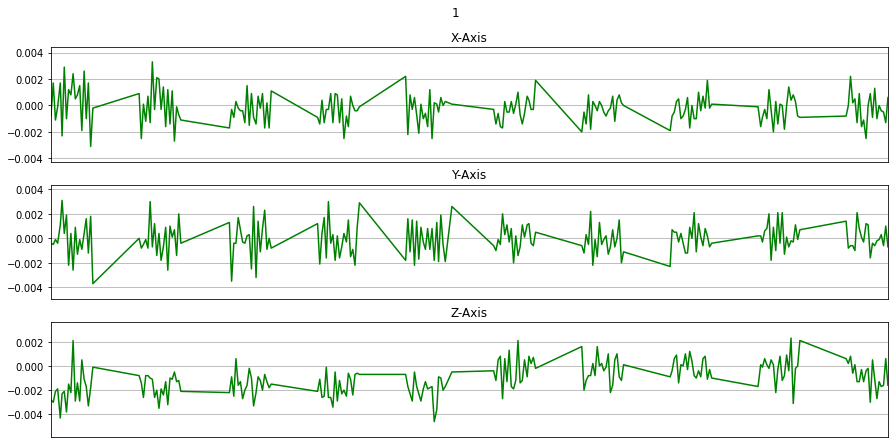

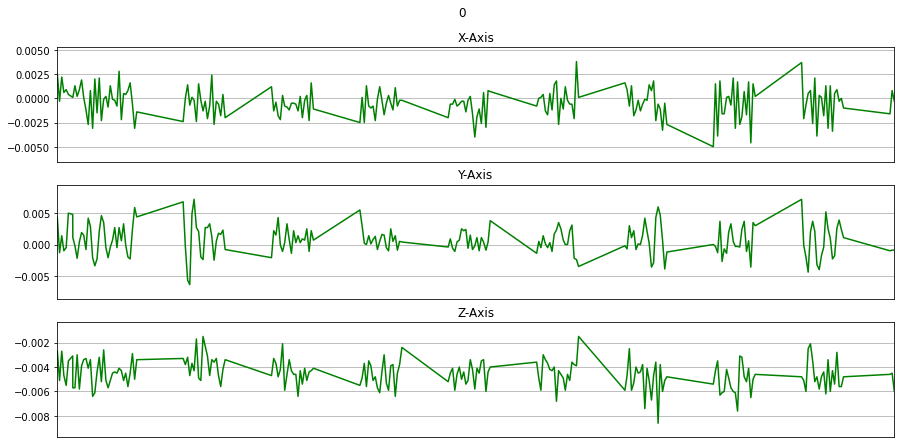

In [27]:
def plot_activity(activity, data):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(15, 7), sharex=True)
    plot_axis(ax0, data['time_acc'], data['x'], 'X-Axis')
    plot_axis(ax1, data['time_acc'], data['y'], 'Y-Axis')
    plot_axis(ax2, data['time_acc'], data['z'], 'Z-Axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()

def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'g')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

for tac in tacs:
    data_for_plot = data[(data['tac'] == tac)][:fs*10]
    plot_activity(tac, data_for_plot)

In [28]:
df = data.drop(['time_acc'], axis = 1).copy()
df.head()

,tac,x,y,z
0,1,-0.0008,-0.0004,-0.0028
1,1,0.0017,-0.0005,-0.0030
2,1,-0.0011,-0.0001,-0.0021
3,1,-0.0001,-0.0004,-0.0019
4,1,0.0017,0.0011,-0.0043


In [29]:
df['tac'].value_counts()

1    96392
0    96392
Name: tac, dtype: int64

In [30]:
positive = df[df['tac']==1].copy()
negative = df[df['tac']==0].copy()

In [31]:
balanced_data = pd.DataFrame()
balanced_data = balanced_data.append([positive, negative])
balanced_data.shape

(192784, 4)

In [32]:
balanced_data['tac'].value_counts()

1    96392
0    96392
Name: tac, dtype: int64

In [33]:
balanced_data.head()

,tac,x,y,z
0,1,-0.0008,-0.0004,-0.0028
1,1,0.0017,-0.0005,-0.0030
2,1,-0.0011,-0.0001,-0.0021
3,1,-0.0001,-0.0004,-0.0019
4,1,0.0017,0.0011,-0.0043


In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
label = LabelEncoder()
balanced_data['label'] = label.fit_transform(balanced_data['tac'])
balanced_data.head()

,tac,x,y,z,label
0,1,-0.0008,-0.0004,-0.0028,1
1,1,0.0017,-0.0005,-0.0030,1
2,1,-0.0011,-0.0001,-0.0021,1
3,1,-0.0001,-0.0004,-0.0019,1
4,1,0.0017,0.0011,-0.0043,1


In [36]:
label.classes_

array([0, 1])

### Standardized data 

In [37]:
X = balanced_data[['x', 'y', 'z']]
y = balanced_data['label']

In [38]:
X

,x,y,z
0,-0.0008,-0.0004,-0.0028
1,0.0017,-0.0005,-0.0030
2,-0.0011,-0.0001,-0.0021
3,-0.0001,-0.0004,-0.0019
4,0.0017,0.0011,-0.0043
...,...,...,...
96387,-0.0571,-0.0671,-0.0038
96388,-0.0984,-0.0623,0.0460
96389,-0.0952,-0.0038,0.0687
96390,-0.0744,0.0052,0.0751


In [39]:
y

0        1
1        1
2        1
3        1
4        1
        ..
96387    0
96388    0
96389    0
96390    0
96391    0
Name: label, Length: 192784, dtype: int64

In [40]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.01389407, -0.04862467,  0.00304169],
       [ 0.00121714, -0.04924156,  0.00161208],
       [-0.01570742, -0.046774  ,  0.00804533],
       ...,
       [-0.58449341, -0.069599  ,  0.51412765],
       [-0.45876813, -0.01407872,  0.5598752 ],
       [-0.16500618,  0.14137809,  0.59347106]])

In [41]:
scaled_X = pd.DataFrame(data = X, columns = ['x', 'y', 'z'])
scaled_X['label'] = y.values

scaled_X

,x,y,z,label
0,-0.013894,-0.048625,0.003042,1
1,0.001217,-0.049242,0.001612,1
2,-0.015707,-0.046774,0.008045,1
3,-0.009663,-0.048625,0.009475,1
4,0.001217,-0.039371,-0.007680,1
...,...,...,...,...
192779,-0.354199,-0.460092,-0.004106,0
192780,-0.603836,-0.430481,0.351867,0
192781,-0.584493,-0.069599,0.514128,0
192782,-0.458768,-0.014079,0.559875,0


### Frame Preparation 

In [42]:
import scipy.stats as stats

In [52]:
Fs = 20
frame_size = Fs*10 # 200
hop_size = Fs*2 # 40

In [53]:
def get_frames(df, frame_size, hop_size):

    N_FEATURES = 3

    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, hop_size):
        x = df['x'].values[i: i + frame_size]
        y = df['y'].values[i: i + frame_size]
        z = df['z'].values[i: i + frame_size]
        
        # Retrieve the most often used label in this segment
        label = stats.mode(df['label'][i: i + frame_size])[0][0]
        frames.append([x, y, z])
        labels.append(label)

    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels

In [54]:
X, y = get_frames(scaled_X, frame_size, hop_size)

In [55]:
X

array([[[-1.38940715e-02,  1.21713978e-03, -1.57074169e-02],
        [-9.66293236e-03,  1.21713978e-03, -2.29607983e-02],
        [ 8.47052121e-03, -1.51029684e-02, -1.80510248e-03],
        ...,
        [ 1.61207958e-03,  2.66302732e-02,  1.51933847e-02],
        [ 3.75649617e-03,  1.37637736e-02,  1.09045515e-02],
        [ 1.16193570e-02,  2.73450787e-02,  1.16193570e-02]],

       [[-1.93341076e-02, -1.08718293e-02, -1.44985200e-02],
        [-7.24513855e-03, -1.02673808e-02, -1.14762777e-02],
        [-1.14762777e-02, -1.69163138e-02,  8.24287794e-06],
        ...,
        [ 3.09191064e-02,  9.47494042e-03,  1.30489681e-02],
        [ 9.47494042e-03,  1.16193570e-02,  1.66229957e-02],
        [ 2.73450787e-02,  2.66302732e-02,  1.59081902e-02]],

       [[ 4.23938204e-03, -2.23563498e-02, -4.22289629e-03],
        [-1.08718293e-02, -5.43179319e-03, -1.32896231e-02],
        [-2.17519014e-02, -8.45403545e-03, -1.51029684e-02],
        ...,
        [ 6.61571829e-03,  8.04532936e-03,

In [56]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [57]:
X.shape, y.shape

((4815, 200, 3), (4815,))

In [58]:
(3555*6)/40

533.25

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [60]:
X_train.shape, X_test.shape

((3852, 200, 3), (963, 200, 3))

In [61]:
X_train[0].shape, X_test[0].shape

((200, 3), (200, 3))

In [62]:
X_train = X_train.reshape(3852, 200, 3, 1)
X_test = X_test.reshape(963, 200, 3, 1)

In [77]:
X_train[0].shape, X_test[0].shape

((200, 3, 1), (200, 3, 1))

### 2D CNN Model 

In [74]:
from tensorflow import keras
model = keras.Sequential()
# model.add(Flatten())
model.add(Conv2D(64, kernel_size = (2,2), activation= tf.nn.relu, input_shape = X_train[0].shape))
model.add(Dropout(0.1))

model.add(Conv2D(64, kernel_size = (2,2), activation= tf.nn.relu))
model.add(Dropout(0.1))

model.add(MaxPool2D(pool_size = (2,2), padding = 'same'))

model.add(Flatten())
model.add(Dense(128, activation = tf.nn.sigmoid))
model.add(Flatten())
# model.add(Dropout(0.5))

# model.add(Dense(6, activation='softmax'))

In [78]:
model = Sequential()
model.add(Conv2D(16, (2, 2), activation = 'relu', input_shape = X_train[0].shape))
model.add(Dropout(0.1))

model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation = 'sigmoid'))
model.add(Dropout(0.5))

model.add(Dense(6, activation='sigmoid'))
model.add(Flatten())

In [64]:
model = Sequential()
model.add(Conv2D(16, (2, 2), activation = 'relu', input_shape = X_train[0].shape))
model.add(Dropout(0.1))

model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))


In [81]:
model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [83]:
history = model.fit(X_train, y_train, epochs = 20, validation_data= (X_test, y_test), verbose=1)

Epoch 1/20
121/121 [==============================] - 3s 27ms/step - loss: 0.1962 - accuracy: 0.3897 - val_loss: 0.1922 - val_accuracy: 0.6573
Epoch 2/20
121/121 [==============================] - 2s 20ms/step - loss: 0.1799 - accuracy: 0.4190 - val_loss: 0.1821 - val_accuracy: 0.6802
Epoch 3/20
121/121 [==============================] - 2s 20ms/step - loss: 0.1731 - accuracy: 0.4136 - val_loss: 0.1849 - val_accuracy: 0.6926
Epoch 4/20
121/121 [==============================] - 2s 20ms/step - loss: 0.1507 - accuracy: 0.4343 - val_loss: 0.1756 - val_accuracy: 0.9221
Epoch 5/20
121/121 [==============================] - 2s 20ms/step - loss: 0.1427 - accuracy: 0.4169 - val_loss: 0.1733 - val_accuracy: 0.6833
Epoch 6/20
121/121 [==============================] - 2s 20ms/step - loss: 0.1380 - accuracy: 0.4117 - val_loss: 0.1710 - val_accuracy: 0.5701
Epoch 7/20
121/121 [==============================] - 2s 20ms/step - loss: 0.1255 - accuracy: 0.3759 - val_loss: 0.1688 - val_accuracy: 0.6054

In [67]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 199, 2, 16)        80        
                                                                 
 dropout (Dropout)           (None, 199, 2, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 198, 1, 32)        2080      
                                                                 
 dropout_1 (Dropout)         (None, 198, 1, 32)        0         
                                                                 
 flatten (Flatten)           (None, 6336)              0         
                                                                 
 dense (Dense)               (None, 64)                405568    
                                                                 
 dropout_2 (Dropout)         (None, 64)                0

In [ ]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

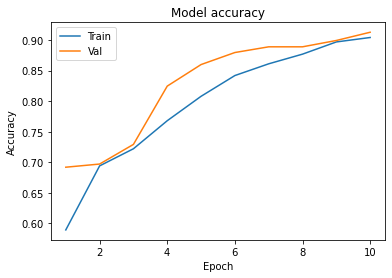

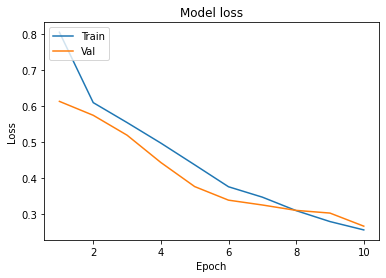

In [ ]:
plot_learningCurve(history, 10)

### Confusion Matrix 

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
model.save_weights('model.h5')
json_string = model.to_json()
open('model.json', 'w').write(json_string)

2857